### Output for manuscript

__Purpose:__ Make charts for an article about the experience of EPFL students and beach litter surveys.

__Background:__ This is in the context of the global movement to reduce plastic debris in the maritime environment. Riverine inputs are major contributors of plastic debris (and all types of refuse) to the oceans. This parts of an analysis of the data collected on the shores of Lake Geneva over a three year period. The maritime protocol was modified in very specific ways to adjust for the local geography and population density.

#### From previous notebooks in this repo:

1. The data was collected at different locations
2. The data was collected by different groups of people
3. For each year there is one group that collected 50% or more of the samples
4. The mean for each year is 9pcs/m +/- 1
5. The median for each year is 5.5pcs/m +/- 1.3
6. The numnber of samples for each year is different
7. Each year has a geographic center
8. All the particpants recieved training on a standardized protocol

#### The survey totals, in pieces of trash per meter, can be summarised as follows:


| Statistic     | Year one | Year two | Year three | Combined   |   
|--------------:|:--------:|:--------:|:----------:|:-----:|
| __Samples__   | <span style="color:red">83</span>       |41        |24          | 148   |
| __mean__      | 8.77     |<span style="color:red">9.99</span>      |9.01        | 9.16  |
| __median__    | 4.83     |<span style="color:red">6.84</span>     |4.24        | 5.52  |
| __Std dev__   | 9.92     |8.52      |<span style="color:red">16.14</span>      |10.75  |
| __25\%ile__   | 3.113    |<span style="color:red">4.41</span>     |2.36        | 3.18  |
| __75\%ile__   | 10.405   |<span style="color:red">12.35</span>    |7.79        | 11.24 | 
| __Minimum__   | 0.68   |0.57      |<span style="color:red">0.11 </span>        | 0.11  | 
| __Maximum__   | 50.075   |39.54     |<span style="color:red">77.05 </span>      | 77.05| 
| _MCBP samples_   |<span style="color:red">80</span>  |<span style="color:red">22</span>    |5   | <span style="color:red">107</span>| 
| _SLR samples_   |0  |18    |<span style="color:red">15</span>      | 33|
| _EPFL samples_  |2 |2     |2| 6| 
| _PC samples_  | 0 |0   |2       | 2| 


In [1]:
# import numpy as np
import json
import csv
import datetime
import collections
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib import cm
from matplotlib import colors as mcolors
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from Utilities.utility_functions import *

In [2]:
# index slicing will be used 
idx = pd.IndexSlice

# store the curent working directory
here = os.getcwd()

# name the folders where the output will be sored:
folders = ["Data", "Charts", "Utilities"]

# check for existing and if not make folders
check_for_folders(folders, here)

# make a dictionary to call path by directory name
my_folders = make_folders(folders, here)
print(my_folders)

Directory already in place
{'Data': '/home/mwshovel/dev/analyst/lake-geneva-env/Data', 'Charts': '/home/mwshovel/dev/analyst/lake-geneva-env/Charts', 'Utilities': '/home/mwshovel/dev/analyst/lake-geneva-env/Utilities'}


In [3]:
# Read the JSON data in from local

# location of the data:
the_jsons = [
    '/home/mwshovel/dev/analyst/lake-geneva-env/Data/beach_info.json',
    '/home/mwshovel/dev/analyst/lake-geneva-env/Data/all_data.json'
]

# all the survey results by code, location, date, project:
my_survey_results = json_file_get(the_jsons[1])

# all the location information:
beach_info = json_file_get(the_jsons[0])

# all the code definitions
code_description = pd.read_csv("Data/mlw_code_defs.csv").to_dict(orient="records")

# transform the code definitions from JSON array to a python dictionary
code_dict = {x["code"]:[x["material"],x["description"],x["source"]] for x in code_description}

# the code def for this object needs to specify metal
code_dict["G178"] = ['Metal', 'Metal bottle caps & lids', 'Food']

# make a data frame from the survey results:
the_survey_results = pd.DataFrame(my_survey_results)    

In [4]:
# make a timestamp column from the JSON string date
the_survey_results["py_date"] = pd.to_datetime(the_survey_results["date"])

# set the start and end dates for the period under study
start_date = datetime.datetime.strptime("2015-11-15", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2015-11-15", "%Y-%m-%d")

In [5]:
# one df for abundance and one df for density:
abundance = the_survey_results[["project_id", "location_id", "date","py_date", "code_id", "quantity"]].copy()

In [9]:
# define the date range
min_date = "Nov-2015"

max_date = "Nov-2017"

date_range = start_end_date("2015-11-15","2017-11-15", "%Y-%m-%d") 

# provide a color map https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
color_map = a_color_map()

# define the style and position for the chart title and the figure title
# For sup title use :ff='sans-serif', fw='roman', fs=14, ha='left', va='baseline'  
title_style = title_styles(fs=12,
                           ff='sans-serif',
                           fw='normal',
                           va='baseline',
                           ha='left'
                          )

sup_title_style = title_styles(fs=14,
                              ff='sans-serif',
                              fw='roman',
                              va='baseline',
                              ha='left'
                             )

# for the sup title position use x=0.13, pad=0
the_title_position = title_position(x=0, pad=15)

sup_title_position = title_position(x=.61, pad=0)

# set the title and sup title content and color
the_title = title_content_color(content="All objects found", color="black")

the_sup_title=title_content_color(content="Lake Geneva", color="black")

# set the legend style and the location of the bounding box
the_legend_style = legend_style(title='Object description: quantity')

# set the legend title and alignment
legend_title = legend_t_align()

# set the axis properties
y_axis = axis_label_props(label="Number of objects found")

x_axis = axis_label_props(label="*Identified items equal to less than 1% of the total.\nCaps and lids are plastic unless noted.")

# adjust the distance from the top of the chart to the plotting area
subplot_params = adjust_subplot_params()

# file save paramteters
save_this = file_params(my_folders["Charts"], "a_new_chart", ".svg")  

In [10]:
def iterateBarchartBlocks(**kwargs):
    
    fig, ax = plt.subplots(figsize=(3,6))
   
    a_df_by_date = get_data_by_date_range(kwargs['a_df'], kwargs['date_range'])
    total_quant = a_df_by_date.quantity.sum()
    
    y_limit = total_quant
    y_max = y_limit + 2
    the_percent = total_quant*kwargs['percent']
    
    the_title["label"] = "{},  total={:,}".format(the_title["label"], total_quant)
    the_sup_title["label"] = '{}, {} - {}'.format(the_sup_title["label"], min_date, max_date)   
    
    the_bottom = 0
    the_data = make_blocks(a_df_by_date,
                           the_percent,
                           date_range,
                           total_quant,
                           code_dict
                          )
   
    color=iter(color_map(np.linspace(.2,.75,len(the_data))))
    
    make_stacked_blocks(the_data, ax, color)  
    
    plt.ylabel(y_axis['label'],
               fontfamily=y_axis['fontfamily'],
               labelpad=y_axis['lablepad'],
               color=y_axis['color'],
               size=y_axis['size']
              )
    
    plt.xlabel(x_axis['label'],
               fontfamily=x_axis['fontfamily'],
               labelpad=x_axis['lablepad'],
               color=x_axis['color'],
               size=x_axis['size'],
               ha='left',
               x=0
              )
    
    plt.subplots_adjust(**subplot_params)
                                                                        
    plt.xticks([0])
    plt.ylim(0, y_max)
    
    plt.title(**the_title, fontdict=title_style, **the_title_position)
    plt.suptitle(the_sup_title['label'],
                 fontdict=sup_title_style,
                 color=the_sup_title['color'],
                 x=sup_title_position["x"]
                )
    
    handles, labels = ax.get_legend_handles_labels()
    this = ax.legend(handles[::-1], labels[::-1], **the_legend_style)
    this._legend_box.align = legend_title['align']
    save_the_figure(**save_this)
 
    plt.show()
    plt.close()  

### Cumulative results Lac Léman Nov 2015 - Nov 2017

[('G27', 10373), ('G82', 7408), ('G79', 5296), ('G30', 3059), ('G95', 2743), ('G67', 1998), ('G200', 1763), ('G21', 892), ('G156', 845), ('G89', 799), ('G178', 690), ('G23', 672), ('G70', 580), ('G24', 557), ('G25', 519), ('G177', 478), ('G35', 470), ('G198', 406), ('G31', 378), ('G208', 355), ('G33', 353), ('G100', 322), ('G10', 301), ('G91', 299), ('G32', 298), ('G22', 295), ('G66', 274), ('G125', 242), ('G204', 209), ('G96', 205), ('G4', 164), ('G34', 164), ('G153', 162), ('G191', 145), ('G152', 134), ('G87', 125), ('G7', 118), ('G5', 117), ('G159', 114), ('G158', 107), ('G211', 106), ('G83', 106), ('G145', 96), ('G28', 93), ('G165', 89), ('G26', 89), ('G175', 87), ('G50', 72), ('G90', 59), ('G8', 47), ('G131', 47), ('G99', 42), ('G161', 39), ('G182', 33), ('G101', 31), ('G65', 30), ('G59', 29), ('G97', 29), ('G142', 28), ('G213', 28), ('G128', 27), ('G126', 27), ('G124', 25), ('G12', 22), ('G3', 17), ('G9', 15), ('G49', 14), ('G151', 13), ('G203', 11), ('G11', 10), ('G154', 9), ('G

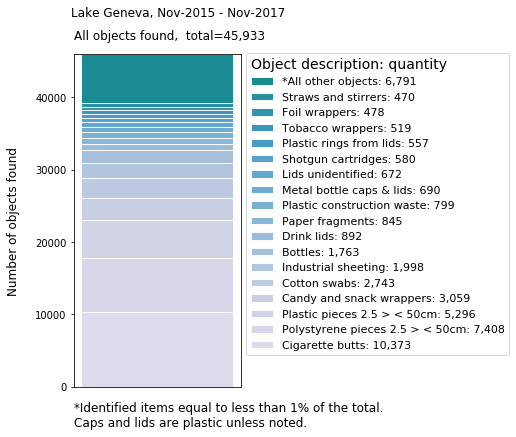

In [11]:
 kwargs = {
     "min_date":min_date,
     "max_date":max_date,
     "a_df":abundance,
     "percent":.01,
     "date_range":date_range,
     "title_style":title_style,
     "the_title_position":the_title_position,
     "the_title":the_title,
     "sup_title_style":sup_title_style,
     "sup_title_position":sup_title_position,
     "the_sup_title":the_sup_title,
     "code_dict":code_dict,
     "the_legend_style":the_legend_style,
     "legend_title":legend_title,
     "color_map":color_map,
     "y_axis":y_axis,
     "x_axis":x_axis,
     "subplot_params":subplot_params,
     "save_this":save_this
 }

iterateBarchartBlocks(**kwargs)

### Cumulative results Saint Sulpice and Parc Parc-des-Pierrettes

In [12]:
day_of_interest = "2017-10-05"
date_of_interest = datetime.datetime.strptime("2017-10-05", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2017-10-06", "%Y-%m-%d")
loc_of_interest = [ "parc-des-pierrettes", "plage-de-st-sulpice"]
parc_des_pierrettes_a = abundance.loc[(abundance.location_id == "parc-des-pierrettes") & (abundance.py_date < end_date)]
saint_sulpice_a = abundance.loc[(abundance.location_id == "plage-de-st-sulpice") & (abundance.py_date < end_date)]

parc_des_pierrettes_day = abundance.loc[(abundance.location_id == "parc-des-pierrettes") & (abundance.py_date == date_of_interest)]
saint_sulpice_day = abundance.loc[(abundance.location_id == "plage-de-st-sulpice") & (abundance.py_date == date_of_interest)]

# group by code id
p_d_p_code_group = get_code_totals_from_date_range(parc_des_pierrettes_a)
s_s_code_group = get_code_totals_from_date_range(saint_sulpice_a)
print(p_d_p_code_group)


# get the top ten, the total quantity found and the total of the top ten for the two locations of interest:
p_d_p_top_ten = p_d_p_code_group[:10]
p_d_p_total = p_d_p_code_group.sum()
p_d_p_top_total = p_d_p_top_ten.sum()
s_s_top_ten = s_s_code_group[:10]
s_s_total = s_s_code_group.sum()
s_s_top_total = s_s_top_ten.sum()

# the make blocks function needs to be modified a little:
def makeBlocks(the_data,total_quant, top_quant):    
    code_totals_tuple = getTuplesFromSeries(the_data)
    code_greater_than = [
        (x[0],x[1],code_describe[x[0]][1])
        for i,x in enumerate(code_totals_tuple)       
    ]    
    the_rest = total_quant - top_quant
    code_greater_than.append(("Other", the_rest,"*All other objects"))
    return code_greater_than
# p_d_p_top_blox = makeBlocks(p_d_p_top_ten, p_d_p_total,p_d_p_top_total )
# s_s_top_blox = makeBlocks(s_s_top_ten,s_s_total,s_s_top_total )

code_id
G82     267
G27     125
G79     116
G95      65
G200     60
G100     51
G30      45
G25      33
G89      24
G204     15
G156     15
G4       14
G177     10
G23      10
G96       9
G87       9
G31       9
G32       8
G21       6
G66       5
G24       5
G7        5
G67       4
G211      4
G145      4
G153      3
G33       3
G203      3
G142      3
G99       3
G70       2
G125      2
G91       2
G35       2
G159      2
G152      1
G26       1
G165      1
G175      1
G178      1
G28       1
G50       1
G10       1
Name: quantity, dtype: int64


In [12]:
# this needs to be changed a little
file_names="fig_9_opt_ss_all_top_ten"
def iterateNewBarchartBlocks(a_df, total_quant, min_date, max_date, title_text, sub_title_text):
    fig, ax = plt.subplots(figsize=(3,6))
    my_cmap = plt.cm.get_cmap(this_map,100)
    total_quant = total_quant
    y_limit = total_quant
    y_max = y_limit + 2
    title = "{},  total={:,}".format(title_text, total_quant)
    sub_title = '{}, {} - {}'.format(sub_title_text, min_date, max_date)
    the_bottom = 0
    the_data = the_data_study
    color=iter(my_cmap(np.linspace(.2,.75,len(the_data))))   
    for i,block in enumerate(the_data):       
        if i == 0:            
            ax.bar(1, block[1], color=next(color), edgecolor="white", alpha=0.9,
                    label="{}: {:,}".format(block[2],block[1]))
            the_bottom += block[1]
        else:            
            ax.bar(1, block[1], color=next(color), edgecolor="white",alpha=0.9,
                   bottom=the_bottom,
                   label="{}: {:,}".format(block[2],block[1]))
            the_bottom += block[1]
    plt.subplots_adjust(top=top_adjust)
    plt.xticks([0])
    plt.ylim(0, y_max)
    plt.ylabel('Number of objects found',fontfamily="sans-serif", labelpad=y_label_padding, color=y_label_color, size=y_label_size)
    plt.xlabel("*Identified items not in the top ten.\nCaps and lids are plastic unless noted.", fontfamily="sans-serif", labelpad=y_label_padding, color=y_label_color, size=y_label_size, ha="left", x=0)
    plt.suptitle(title, fontfamily="sans-serif", fontweight="roman", fontsize=14, x=0.13, ha="left", color=title_color)
    plt.title(sub_title, fontdict=font_styles, pad=pad, x=0, ha="left", color=title_color)
    handles, labels = ax.get_legend_handles_labels()
    this = ax.legend(handles[::-1], labels[::-1], title='Object description: quantity',title_fontsize=legend_title_size, fontsize=legend_font_size, bbox_to_anchor=b_box, loc='upper left')
    this._legend_box.align = "left"
#     for x in file_suffix:
#         save_me = '{}/{}{}'.format(file_prefix, file_names, x)
#         plt.savefig(save_me, bbox_inches="tight")     
    plt.show()
    plt.close()  

#### The top ten Plage de Saint Sulpice

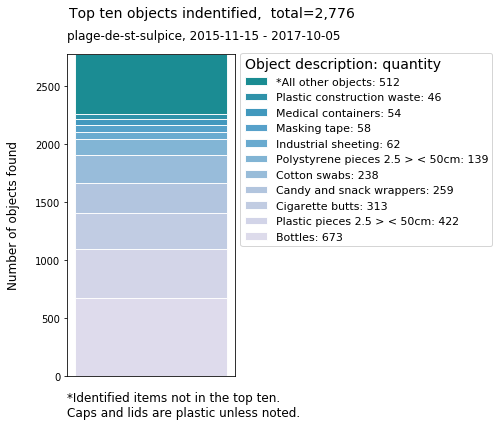

In [13]:
# the variables:
# the_data_study, total_quant, min_date, max_date, title_text, sub_title_text
iterateNewBarchartBlocks(
    s_s_top_blox,s_s_total,
    "2015-11-15",day_of_interest,
    "Top ten objects indentified",
    loc_of_interest[1]
)

#### The top ten Parc des Pierrettes

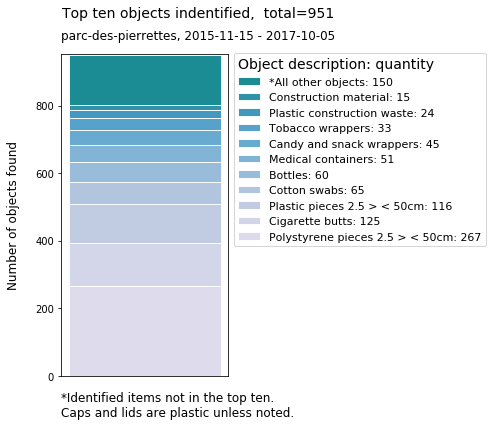

In [14]:
file_names="fig_9_opt_pdp_all_top_ten"
iterateNewBarchartBlocks(
    p_d_p_top_blox,
    p_d_p_total,
    "2015-11-15",
    day_of_interest,
    "Top ten objects indentified",
    loc_of_interest[0]
)

#### Material Parc des Pierrettes

In [15]:
# make a grouper for the material
def makeMaterialDict(aDict):
    what_i_want = {"Plastic":[], "Rubber":[], "Wood":[], "Metal":[], "Paper":[], "Cloth":[], "Glass":[]}
    for key,value in aDict.items():
        if value[0] in what_i_want.keys():
            what_i_want[value[0]].append(key)
    return what_i_want
material_groups = makeMaterialDict(code_describe)

def makeMaterialTotals(data, material_groups):
    what_i_want = {"Plastic":0, "Rubber":0, "Wood":0, "Metal":0, "Paper":0, "Cloth":0, "Glass":0}
    code_totals_tuple = getTuplesFromSeries(data)
    for x in code_totals_tuple:
        for key, value in material_groups.items():
            if x[0] in value:
                what_i_want[key] += x[1]
    return what_i_want
pdp_material_block = makeMaterialTotals(p_d_p_code_group, material_groups)
s_s_material_block = makeMaterialTotals(s_s_code_group, material_groups)

In [16]:
def iterateMaterialBarchartBlocks(the_data_study, total_quant, min_date, max_date, title_text, sub_title_text, file_names):
    fig, ax = plt.subplots(figsize=(3,6))
    my_cmap = plt.cm.get_cmap(this_map,100)
    total_quant = total_quant
    y_limit = total_quant
    y_max = y_limit + 2
    title = "{},  total={:,}".format(title_text, total_quant)
    sub_title = '{}, {} - {}'.format(sub_title_text, min_date, max_date)
    the_bottom = 0
    the_data = [(key,value) for key, value in the_data_study.items()]
    the_data = sorted(the_data, key=lambda x: -x[1])
    color=iter(my_cmap(np.linspace(.2,.75,len(the_data))))   
    for i,block in enumerate(the_data):       
        if i == 0:            
            ax.bar(1, block[1], color=next(color), edgecolor="white", alpha=0.9,
                    label="{}: {:}".format(block[0],block[1]))
            the_bottom += block[1]
        else:            
            ax.bar(1, block[1], color=next(color), edgecolor="white",alpha=0.9,
                   bottom=the_bottom,
                   label="{}: {:}".format(block[0],block[1]))
            the_bottom += block[1]
    plt.subplots_adjust(top=top_adjust)
    plt.xticks([0])
    plt.ylim(0, y_max)
    plt.ylabel('Number of objects found',fontfamily="sans-serif", labelpad=y_label_padding, color=y_label_color, size=y_label_size)
#     plt.xlabel("*Identified items not in the top ten.\nCaps and lids are plastic unless noted.", fontfamily="sans-serif", labelpad=y_label_padding, color=y_label_color, size=y_label_size, ha="left", x=0)
    plt.suptitle(title, fontfamily="sans-serif", fontweight="roman", fontsize=14, x=0.13, ha="left", color=title_color)
    plt.title(sub_title, fontdict=font_styles, pad=pad, x=0, ha="left", color=title_color)
    handles, labels = ax.get_legend_handles_labels()
    this = ax.legend(handles[::-1], labels[::-1], title='Material: quantity',title_fontsize=legend_title_size, fontsize=legend_font_size, bbox_to_anchor=b_box, loc='upper left')
    this._legend_box.align = "left"
    for x in file_suffix:
        save_me = '{}/{}{}'.format(file_prefix, file_names, x)
        plt.savefig(save_me, bbox_inches="tight")     
    plt.show()
    plt.close()  

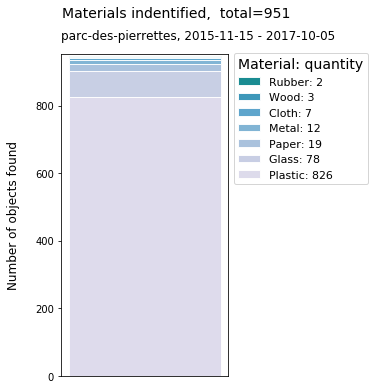

In [17]:
# the variables:
# iterateMaterialBarchartBlocks(the_data_study, min_date, max_date, title_text, sub_title_text)
file_names="fig_9_opt_pp_all_material"
iterateMaterialBarchartBlocks(
    pdp_material_block,
    p_d_p_total,
    "2015-11-15",
    day_of_interest,
    "Materials indentified",
    loc_of_interest[0],
    file_names
)

#### Material Saint Sulpice

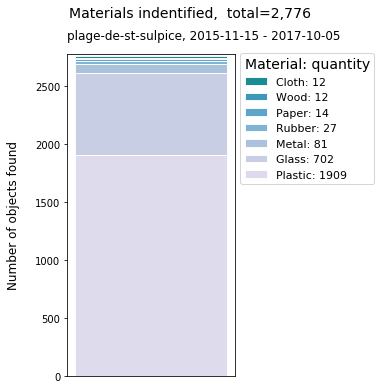

In [18]:
file_names="fig_9_opt_ss_all_material"
iterateMaterialBarchartBlocks(
    s_s_material_block ,
    s_s_total,
    "2015-11-15",
    day_of_interest,
    "Materials indentified",
    loc_of_interest[1],
    file_names,
)

#### Source Parc des Pierrettes

In [19]:
# get the source keys

my_sources = [value[2] for key,value in code_describe.items()]
my_sources = list(np.unique(my_sources))
my_sources.remove('None')

def makeSourceDict(aDict, my_sources):
    what_i_want ={x:[] for x in my_sources}
    for key,value in aDict.items():
        if value[2] in what_i_want.keys():
            what_i_want[value[2]].append(key)
    return what_i_want
source_groups = makeSourceDict(code_describe,my_sources)

def makeSourceTotals(data, material_groups):
    what_i_want = {x:0 for x in material_groups}
    code_totals_tuple = getTuplesFromSeries(data)
    for x in code_totals_tuple:
        for key, value in material_groups.items():
            if x[0] in value:
                what_i_want[key] += x[1]
    return what_i_want

pdp_source_block = makeSourceTotals(p_d_p_code_group, source_groups)
s_s_source_block = makeSourceTotals(s_s_code_group, source_groups)

In [20]:
def iterateSourceBarchartBlocks(the_data_study, total_quant, min_date, max_date, title_text, sub_title_text):
    fig, ax = plt.subplots(figsize=(3,6))
    my_cmap = plt.cm.get_cmap(this_map,100)
    total_quant = total_quant
    y_limit = total_quant
    y_max = y_limit + 2
    title = "{},  total={:,}".format(title_text, total_quant)
    sub_title = '{}, {} - {}'.format(sub_title_text, min_date, max_date)
    the_bottom = 0
    the_data = [(key,value) for key, value in the_data_study.items()]
    the_data = sorted(the_data, key=lambda x: -x[1])
    color=iter(my_cmap(np.linspace(.2,.75,len(the_data))))   
    for i,block in enumerate(the_data):       
        if i == 0:            
            ax.bar(1, block[1], color=next(color), edgecolor="white", alpha=0.9,
                    label="{}: {:}".format(block[0],block[1]))
            the_bottom += block[1]
        else:            
            ax.bar(1, block[1], color=next(color), edgecolor="white",alpha=0.9,
                   bottom=the_bottom,
                   label="{}: {:}".format(block[0],block[1]))
            the_bottom += block[1]
    plt.subplots_adjust(top=top_adjust)
    plt.xticks([0])
    plt.ylim(0, y_max)
    plt.ylabel('Number of objects found',fontfamily="sans-serif", labelpad=y_label_padding, color=y_label_color, size=y_label_size)
#     plt.xlabel("*Identified items not in the top ten.\nCaps and lids are plastic unless noted.", fontfamily="sans-serif", labelpad=y_label_padding, color=y_label_color, size=y_label_size, ha="left", x=0)
    plt.suptitle(title, fontfamily="sans-serif", fontweight="roman", fontsize=14, x=0.13, ha="left", color=title_color)
    plt.title(sub_title, fontdict=font_styles, pad=pad, x=0, ha="left", color=title_color)
    handles, labels = ax.get_legend_handles_labels()
    this = ax.legend(handles[::-1], labels[::-1], title='Source: quantity',title_fontsize=legend_title_size, fontsize=legend_font_size, bbox_to_anchor=b_box, loc='upper left')
    this._legend_box.align = "left"
#     for x in file_suffix:
#         save_me = '{}/{}{}'.format(file_prefix, file_names, x)
#         plt.savefig(save_me, bbox_inches="tight")     
    plt.show()
    plt.close()  

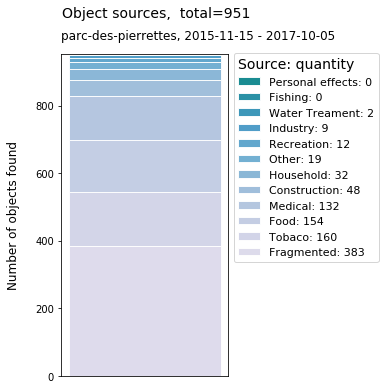

In [21]:
file_names="fig_9_opt_pp_all_source"
iterateSourceBarchartBlocks(
    pdp_source_block,
    p_d_p_total,
    "2015-11-15",
    day_of_interest,
    "Object sources",
    loc_of_interest[0]
)

#### Source Saint Sulpice

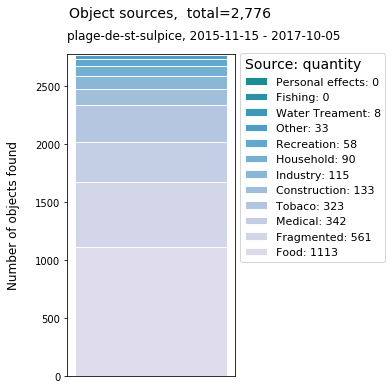

In [22]:
file_names="fig_9_opt_ss_all_source"
iterateSourceBarchartBlocks(
    s_s_source_block,
    s_s_total,
    "2015-11-15",
    day_of_interest,
    "Object sources",
    loc_of_interest[1]
)

### Results on the day of interest

In [23]:
p_d_p_day_code = getCodeTotalsFromDateRange(parc_des_pierrettes_day )
s_s_day_code = getCodeTotalsFromDateRange(saint_sulpice_day )
p_d_p_top_ten_day = p_d_p_day_code[:10]
p_d_p_total_day = p_d_p_day_code.sum()
p_d_p_top_total_day = p_d_p_top_ten_day .sum()
s_s_top_ten_day = s_s_day_code[:10]
s_s_total_day= s_s_day_code.sum()
s_s_top_total_day = s_s_top_ten_day.sum()

In [24]:
# makeBlocks(the_data,total_quant, top_quant):

p_d_p_top_blox_day = makeBlocks(p_d_p_top_ten_day, p_d_p_total_day,p_d_p_top_total_day  )
s_s_top_blox_day = makeBlocks(s_s_top_ten_day,s_s_total_day,s_s_top_total_day )

In [25]:
def iterateDailychartBlocks(the_data_study, total_quant, date, title_text, sub_title_text):
    fig, ax = plt.subplots(figsize=(3,6))
    my_cmap = plt.cm.get_cmap(this_map,100)
    total_quant = total_quant
    y_limit = total_quant
    y_max = y_limit + 2
    title = "{},  total={:,}".format(title_text, total_quant)
    sub_title = '{}, {}'.format(sub_title_text, date)
    the_bottom = 0
    the_data = the_data_study
    color=iter(my_cmap(np.linspace(.2,.75,len(the_data))))   
    for i,block in enumerate(the_data):       
        if i == 0:            
            ax.bar(1, block[1], color=next(color), edgecolor="white", alpha=0.9,
                    label="{}: {:,}".format(block[2],block[1]))
            the_bottom += block[1]
        else:            
            ax.bar(1, block[1], color=next(color), edgecolor="white",alpha=0.9,
                   bottom=the_bottom,
                   label="{}: {:,}".format(block[2],block[1]))
            the_bottom += block[1]
    plt.subplots_adjust(top=top_adjust)
    plt.xticks([0])
    plt.ylim(0, y_max)
    plt.ylabel('Number of objects found',fontfamily="sans-serif", labelpad=y_label_padding, color=y_label_color, size=y_label_size)
    plt.xlabel("*Identified items not in the top ten.\nCaps and lids are plastic unless noted.", fontfamily="sans-serif", labelpad=y_label_padding, color=y_label_color, size=y_label_size, ha="left", x=0)
    plt.suptitle(title, fontfamily="sans-serif", fontweight="roman", fontsize=14, x=0.13, ha="left", color=title_color)
    plt.title(sub_title, fontdict=font_styles, pad=pad, x=0, ha="left", color=title_color)
    handles, labels = ax.get_legend_handles_labels()
    this = ax.legend(handles[::-1], labels[::-1], title='Object description: quantity',title_fontsize=legend_title_size, fontsize=legend_font_size, bbox_to_anchor=b_box, loc='upper left')
    this._legend_box.align = "left"
#     for x in file_suffix:
#         save_me = '{}/{}{}'.format(file_prefix, file_names, x)
#         plt.savefig(save_me, bbox_inches="tight")     
    plt.show()
    plt.close()  

#### Top ten Parc des Pierrettes

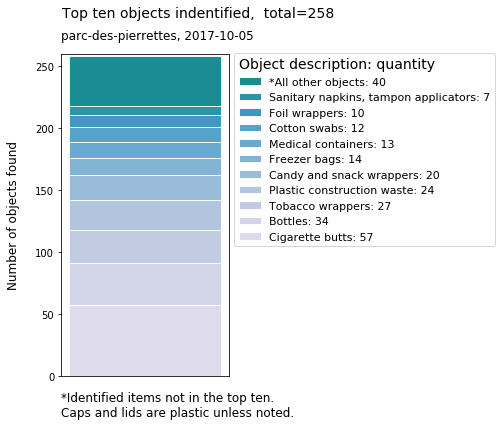

In [26]:
file_names="fig_9_pp_top_ten"
iterateDailychartBlocks(
    p_d_p_top_blox_day,p_d_p_total_day,
    day_of_interest,
    "Top ten objects indentified",
    loc_of_interest[0]
)

#### Top ten Saint Sulpice

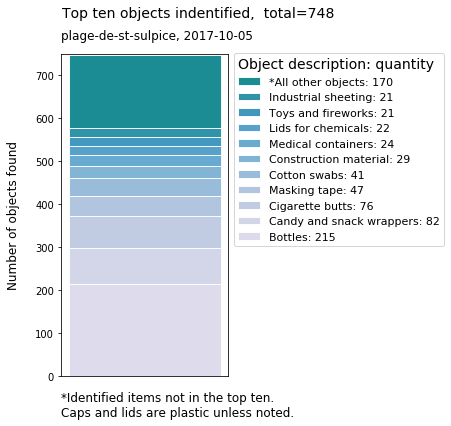

In [27]:
file_names="fig_9_ss_top_ten"
iterateDailychartBlocks(
    s_s_top_blox_day,s_s_total_day,
    day_of_interest,
    "Top ten objects indentified",
    loc_of_interest[1]
)

In [28]:
pdp_material_block_d = makeMaterialTotals(p_d_p_day_code, material_groups)
s_s_material_block_d = makeMaterialTotals(s_s_day_code, material_groups)

In [29]:
def iterateMaterialBarchartBlocksDay(the_data_study, total_quant,date, title_text, sub_title_text):
    fig, ax = plt.subplots(figsize=(3,6))
    my_cmap = plt.cm.get_cmap(this_map,100)
    total_quant = total_quant
    y_limit = total_quant
    y_max = y_limit + 2
    title = "{},  total={:,}".format(title_text, total_quant)
    sub_title = '{}, {}'.format(sub_title_text, date)
    the_bottom = 0
    the_data = [(key,value) for key, value in the_data_study.items()]
    the_data = sorted(the_data, key=lambda x: -x[1])
    color=iter(my_cmap(np.linspace(.2,.75,len(the_data))))   
    for i,block in enumerate(the_data):       
        if i == 0:            
            ax.bar(1, block[1], color=next(color), edgecolor="white", alpha=0.9,
                    label="{}: {:}".format(block[0],block[1]))
            the_bottom += block[1]
        else:            
            ax.bar(1, block[1], color=next(color), edgecolor="white",alpha=0.9,
                   bottom=the_bottom,
                   label="{}: {:}".format(block[0],block[1]))
            the_bottom += block[1]
    plt.subplots_adjust(top=top_adjust)
    plt.xticks([0])
    plt.ylim(0, y_max)
    plt.ylabel('Number of objects found',fontfamily="sans-serif", labelpad=y_label_padding, color=y_label_color, size=y_label_size)
#     plt.xlabel("*Identified items not in the top ten.\nCaps and lids are plastic unless noted.", fontfamily="sans-serif", labelpad=y_label_padding, color=y_label_color, size=y_label_size, ha="left", x=0)
    plt.suptitle(title, fontfamily="sans-serif", fontweight="roman", fontsize=14, x=0.13, ha="left", color=title_color)
    plt.title(sub_title, fontdict=font_styles, pad=pad, x=0, ha="left", color=title_color)
    handles, labels = ax.get_legend_handles_labels()
    this = ax.legend(handles[::-1], labels[::-1], title='Material: quantity',title_fontsize=legend_title_size, fontsize=legend_font_size, bbox_to_anchor=b_box, loc='upper left')
    this._legend_box.align = "left"
#     for x in file_suffix:
#         save_me = '{}/{}{}'.format(file_prefix, file_names, x)
#         plt.savefig(save_me, bbox_inches="tight")     
    plt.show()
    plt.close()  

#### Materials Saint Sulpice

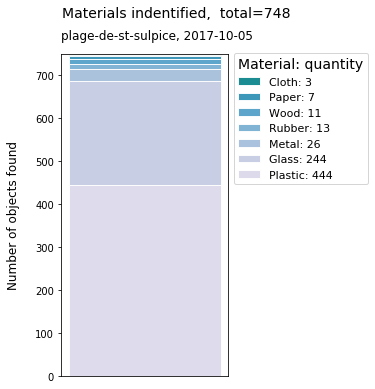

In [30]:
file_names="fig_9_ss_material"
iterateMaterialBarchartBlocksDay(
    s_s_material_block_d,
    s_s_total_day,
    day_of_interest,
    "Materials indentified",
    loc_of_interest[1]
)

#### Material Parc des Pierrettes

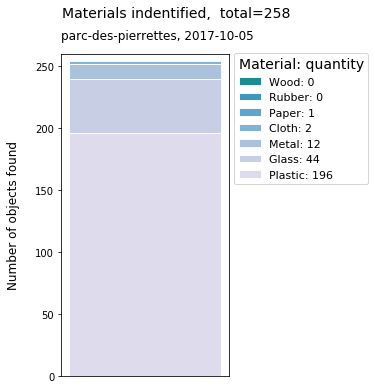

In [31]:
file_names="fig_9_pp_material"
iterateMaterialBarchartBlocksDay(
    pdp_material_block_d,
    p_d_p_total_day,
    day_of_interest,
    "Materials indentified",
    loc_of_interest[0]
)

In [99]:
pdp_source_block_day = makeSourceTotals(p_d_p_day_code, source_groups)
s_s_source_block_day = makeSourceTotals(s_s_day_code, source_groups)

In [100]:
def iterateSourceBarchartBlocksDay(the_data_study, total_quant, date, title_text, sub_title_text):
    fig, ax = plt.subplots(figsize=(3,6))
    my_cmap = plt.cm.get_cmap(this_map,100)
    total_quant = total_quant
    y_limit = total_quant
    y_max = y_limit + 2
    title = "{},  total={:,}".format(title_text, total_quant)
    sub_title = '{}, {}'.format(sub_title_text, date)
    the_bottom = 0
    the_data = [(key,value) for key, value in the_data_study.items()]
    the_data = sorted(the_data, key=lambda x: -x[1])
    color=iter(my_cmap(np.linspace(.2,.75,len(the_data))))   
    for i,block in enumerate(the_data):       
        if i == 0:            
            ax.bar(1, block[1], color=next(color), edgecolor="white", alpha=0.9,
                    label="{}: {:}".format(block[0],block[1]))
            the_bottom += block[1]
        else:            
            ax.bar(1, block[1], color=next(color), edgecolor="white",alpha=0.9,
                   bottom=the_bottom,
                   label="{}: {:}".format(block[0],block[1]))
            the_bottom += block[1]
    plt.subplots_adjust(top=top_adjust)
    plt.xticks([0])
    plt.ylim(0, y_max)
    plt.ylabel('Number of objects found',fontfamily="sans-serif", labelpad=y_label_padding, color=y_label_color, size=y_label_size)
    plt.suptitle(title, fontfamily="sans-serif", fontweight="roman", fontsize=14, x=0.13, ha="left", color=title_color)
    plt.title(sub_title, fontdict=font_styles, pad=pad, x=0, ha="left", color=title_color)
    handles, labels = ax.get_legend_handles_labels()
    this = ax.legend(handles[::-1], labels[::-1], title='Source: quantity',title_fontsize=legend_title_size, fontsize=legend_font_size, bbox_to_anchor=b_box, loc='upper left')
    this._legend_box.align = "left"
    for x in file_suffix:
        save_me = '{}/{}{}'.format(file_prefix, file_names, x)
        plt.savefig(save_me, bbox_inches="tight")     
    plt.show()
    plt.close()  

#### Source Saint Sulpice

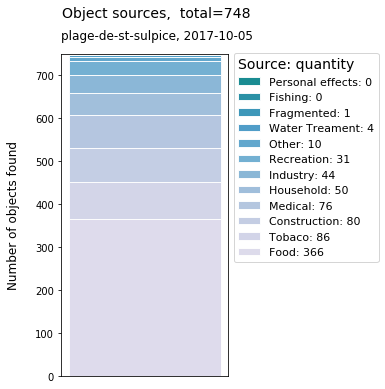

In [101]:
file_names="fig_9_ss_source"
iterateSourceBarchartBlocksDay(
    s_s_source_block_day,
    s_s_total_day,
    day_of_interest,
    "Object sources",
    loc_of_interest[1]
)

#### Source Parc des Pierrettes

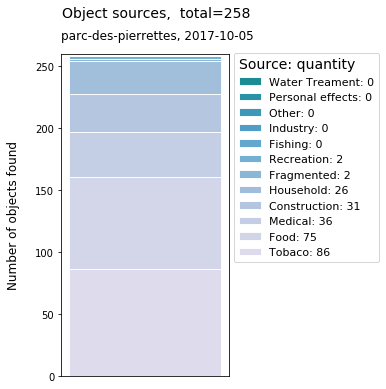

In [102]:
file_names="fig_9_pp_source"
iterateSourceBarchartBlocksDay(
    pdp_source_block_day,
    p_d_p_total_day,
    day_of_interest,
    "Object sources",
    loc_of_interest[0]
)